## Business Problem
>Have you ever wondered how lenders use various factors such as credit score, annual income, the loan amount approved, tenure, debt-to-income ratio etc. and select your interest rates? 

>The process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates based on clients’ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.

>You can use any combination of the features in the dataset to make your loan rate category predictions. Some features will be easier to use than others.

| Variable | Definition |
| --- | --- |
| Loan_ID | A unique id for the loan. |
| Loan_Amount_Requested | The listed amount of the loan applied for by the borrower. |
| Length_Employed | Employment length in years |
| Home_Owner | The home ownership status provided by the borrower during registration. Values are: Rent, Own, Mortgage, Other. |
| Annual_Income | The annual income provided by the borrower during registration. |
| Income_Verified | Indicates if income was verified, not verified, or if the income source was verified |
| Purpose_Of_Loan | A category provided by the borrower for the loan request. |
| Debt_To_Income | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income. |
| Inquiries_Last_6Mo | The number of inquiries by creditors during the past 6 months. |
| Months_Since_Deliquency | The number of months since the borrower's last delinquency. |
| Number_Open_Accounts | The number of open credit lines in the borrower's credit file. |
| Total_Accounts | The total number of credit lines currently in the borrower's credit file |
| Gender | Gender |
| Interest_Rate | Target Variable: Interest Rate category (1/2/3) of the loan application |

## Evaluation Metric
> The evaluation metric for this competition is Weighted F1 Score.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [3]:
data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [59]:
test_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [60]:
data.isnull().sum() * 100 / len(data)
test_data.isnull().sum() * 100 / len(test_data)

Loan_ID                     0.000000
Loan_Amount_Requested       0.000000
Length_Employed             4.506075
Home_Owner                 15.255475
Annual_Income              15.426187
Income_Verified             0.000000
Purpose_Of_Loan             0.000000
Debt_To_Income              0.000000
Inquiries_Last_6Mo          0.000000
Months_Since_Deliquency    53.732392
Number_Open_Accounts        0.000000
Total_Accounts              0.000000
Gender                      0.000000
dtype: float64

In [61]:
# Converting Loan_Amount_Requested from object to integer type
data['Loan_Amount_Requested'] = [ int(x) if len(x.split(","))<=1 else int(x.split(',')[0] + x.split(',')[1]) for x in data['Loan_Amount_Requested']]

test_data['Loan_Amount_Requested'] = [ int(x) if len(x.split(","))<=1 else int(x.split(',')[0] + x.split(',')[1]) for x in test_data['Loan_Amount_Requested']]

In [7]:
data['Home_Owner'].value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [62]:
# removing missing values
# We will be dropping column "Months_Since_Deliquency" as this column has more than 50% missing values

data_notnull = data.drop('Months_Since_Deliquency',axis=1)
data_notnull.dropna(inplace=True)

test_data.drop('Months_Since_Deliquency',axis=1,inplace=True)
test_data.dropna(inplace=True)

In [63]:
data_notnull.shape

(112510, 13)

In [64]:
data_notnull.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
2,10000003,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
4,10000005,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1
5,10000006,4500,2 years,Rent,30000.0,VERIFIED - income source,credit_card,10.88,1,12,15,Male,3
6,10000007,18075,4 years,Rent,85000.0,VERIFIED - income,debt_consolidation,5.65,0,9,12,Male,3


In [65]:
data_notnull['Length_Employed'].value_counts()

10+ years    37898
2 years      10483
3 years       9310
< 1 year      9227
5 years       7711
1 year        7466
4 years       7061
7 years       6655
6 years       6590
8 years       5623
9 years       4486
Name: Length_Employed, dtype: int64

In [12]:
data_notnull['Home_Owner'].value_counts()

Mortgage    57076
Rent        45713
Own          9674
Other          38
None            9
Name: Home_Owner, dtype: int64

In [13]:
data_notnull['Income_Verified'].value_counts()

VERIFIED - income           38442
not verified                37056
VERIFIED - income source    37012
Name: Income_Verified, dtype: int64

In [14]:
data_notnull['Purpose_Of_Loan'].value_counts()

debt_consolidation    66803
credit_card           24945
home_improvement       6261
other                  5623
major_purchase         2356
small_business         1655
car                    1285
medical                1052
moving                  657
wedding                 596
vacation                563
house                   536
educational              97
renewable_energy         81
Name: Purpose_Of_Loan, dtype: int64

In [15]:
data_notnull['Total_Accounts'].value_counts().sort_index()

2        6
3       90
4      350
5      543
6      844
      ... 
98       1
99       1
105      1
116      1
156      1
Name: Total_Accounts, Length: 98, dtype: int64

In [16]:
cat_columns = []
cont_columns = []

for col in data_notnull.columns:
    if data_notnull[col].dtype=='object':
        cat_columns.append(col)
    else:
        cont_columns.append(col)

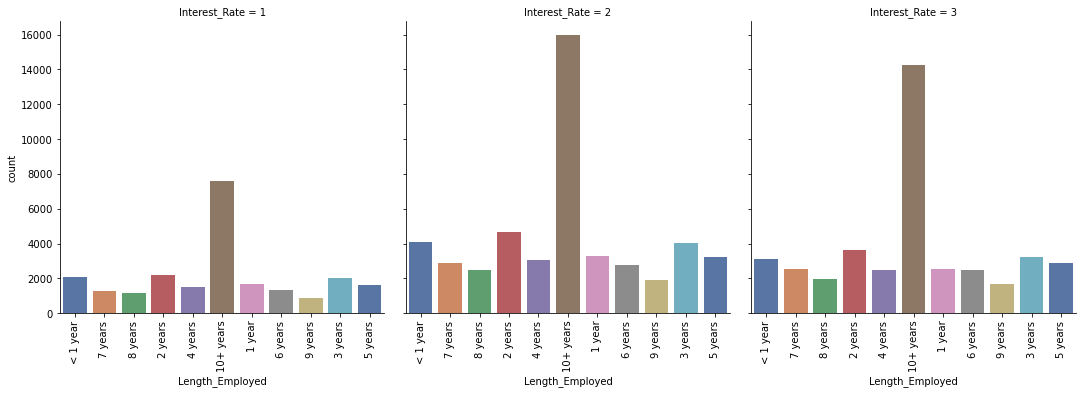

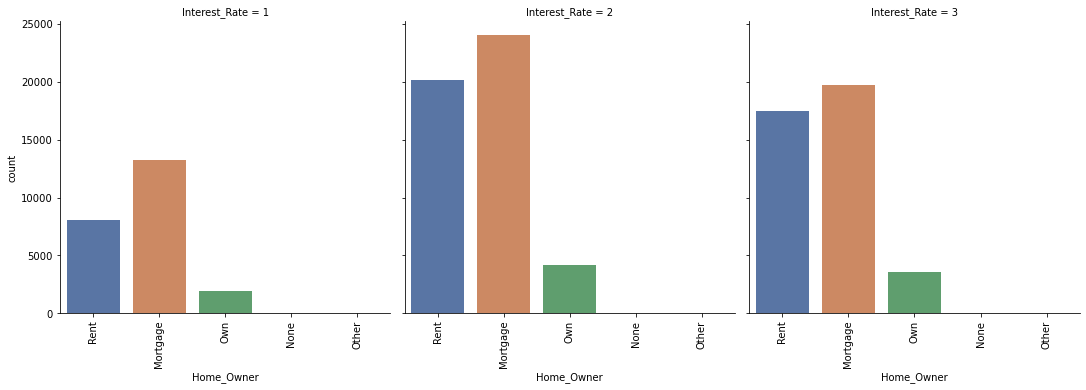

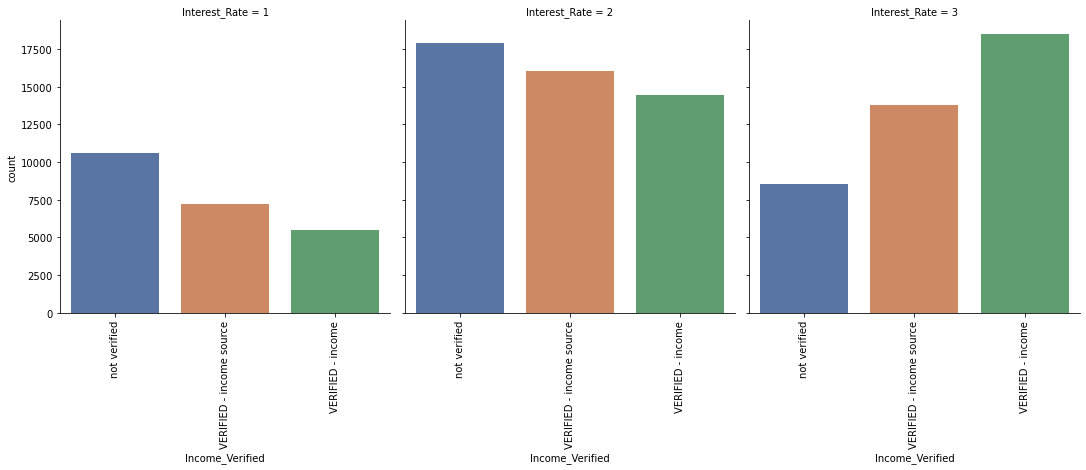

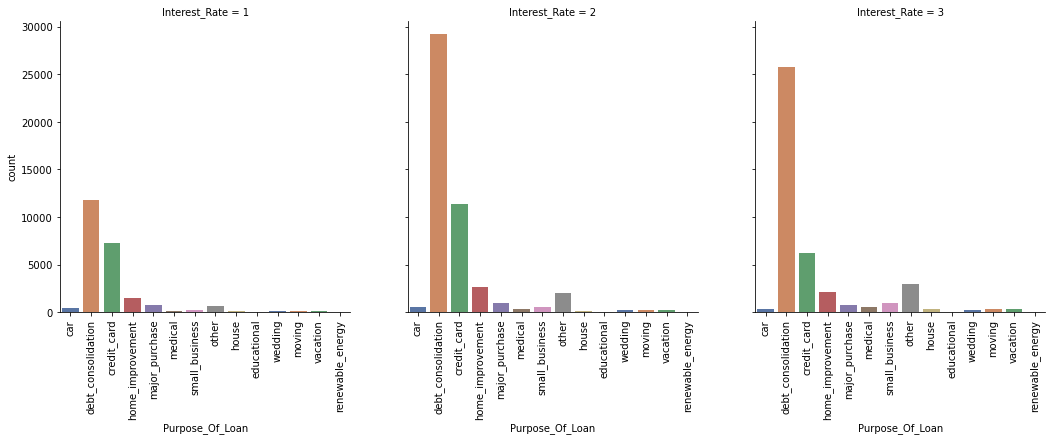

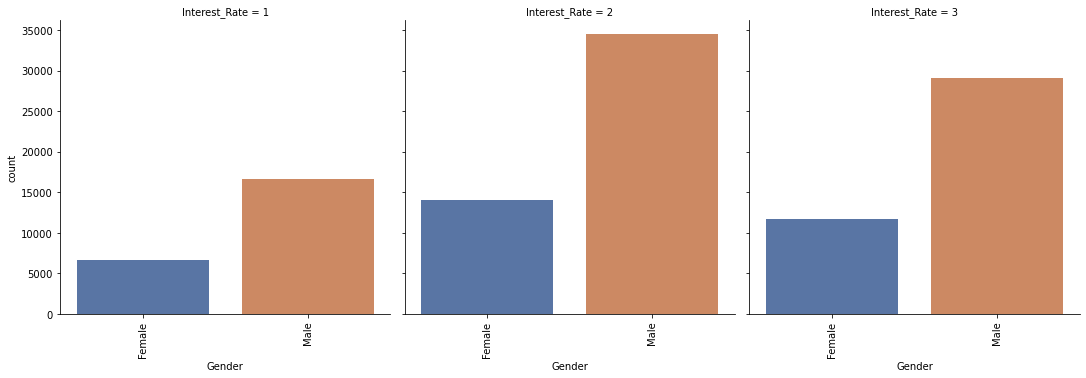

In [17]:
target = 'Interest_Rate'
for col in cat_columns:
    s = sns.catplot(x=col, col = target, data=data_notnull, kind = 'count', palette='deep')
    s.set_xticklabels(rotation=90)

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


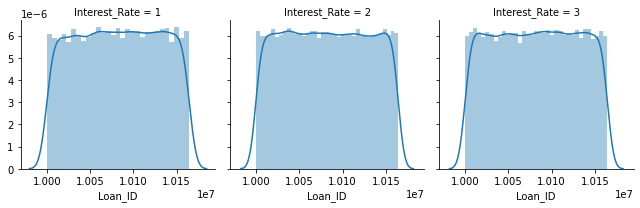

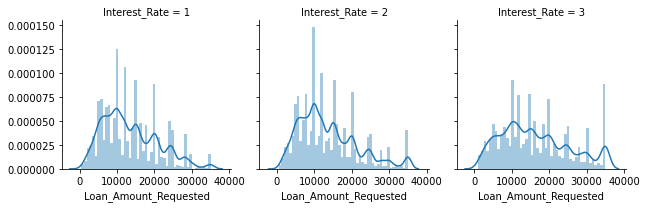

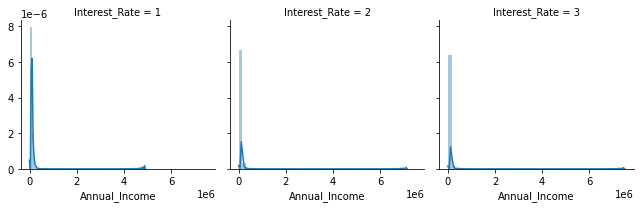

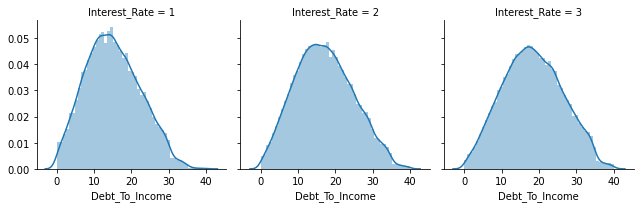

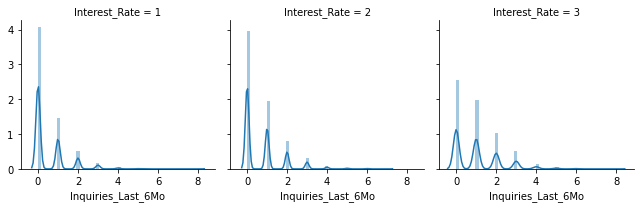

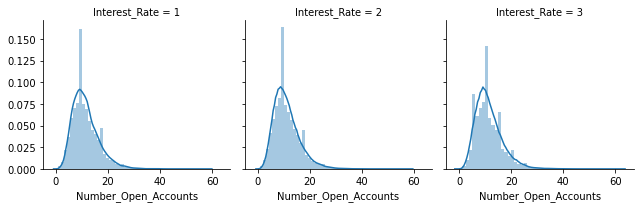

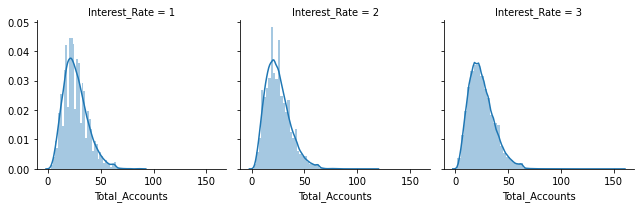

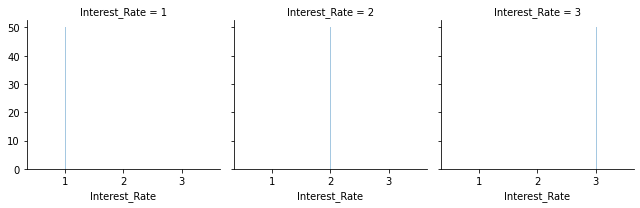

In [18]:
for col in cont_columns:
    g = sns.FacetGrid(data_notnull, col='Interest_Rate')
    g = g.map(sns.distplot, col)

In [19]:
data_notnull.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
2,10000003,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
4,10000005,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1
5,10000006,4500,2 years,Rent,30000.0,VERIFIED - income source,credit_card,10.88,1,12,15,Male,3
6,10000007,18075,4 years,Rent,85000.0,VERIFIED - income,debt_consolidation,5.65,0,9,12,Male,3


In [66]:
print(data_notnull['Loan_Amount_Requested'].min())
print(data_notnull['Loan_Amount_Requested'].max())
data_notnull['Loan_Amount_Requested'].value_counts()
"""500_5000 : Grp_1
5001_10000 : Grp_2
10001_15000 : Grp_2
15001_20000 : Grp_3
20001_25000 : Grp_4
25001+ : Grp_5"""

data_notnull['Loan_Amount_Requested_Grp'] = ["Grp_1" if 0<=x<=5000 else
                                             "Grp_2" if 5001<=x<=10000 else
                                             "Grp_3" if 10001<=x<=15000 else
                                             "Grp_4" if 15001<=x<=20000 else
                                             "Grp_5"  for x in data_notnull['Loan_Amount_Requested']]

test_data['Loan_Amount_Requested_Grp'] = ["Grp_1" if 0<=x<=5000 else
                                             "Grp_2" if 5001<=x<=10000 else
                                             "Grp_3" if 10001<=x<=15000 else
                                             "Grp_4" if 15001<=x<=20000 else
                                             "Grp_5"  for x in test_data['Loan_Amount_Requested']]

500
35000


In [21]:
data_notnull['Loan_Amount_Requested_Grp'].value_counts().sort_index()

Grp_1    13227
Grp_2    30612
Grp_3    25432
Grp_4    19047
Grp_5    24192
Name: Loan_Amount_Requested_Grp, dtype: int64

In [67]:
data_notnull['Length_Employed'].value_counts().sort_index() 
"""0_2 : Grp_1
2_4 : Grp_2
4_6 : Grp_3
6_8 : Grp_4
8_10 : Grp_5
10+ : Grp_6"""

data_notnull['Length_Employed_Grp'] = ["Grp_1" if x in ['< 1 year','1 year'] else
                                             "Grp_2" if x in ['2 years','3 years'] else
                                             "Grp_3" if x in ['4 years','5 years'] else
                                             "Grp_4" if x in ['6 years','7 years'] else
                                             "Grp_5" if x in ['8 years','9 years'] else
                                             "Grp_6"  for x in data_notnull['Length_Employed']]

test_data['Length_Employed_Grp'] = ["Grp_1" if x in ['< 1 year','1 year'] else
                                             "Grp_2" if x in ['2 years','3 years'] else
                                             "Grp_3" if x in ['4 years','5 years'] else
                                             "Grp_4" if x in ['6 years','7 years'] else
                                             "Grp_5" if x in ['8 years','9 years'] else
                                             "Grp_6"  for x in test_data['Length_Employed']]

In [23]:
data_notnull['Length_Employed_Grp'].value_counts().sort_index()

Grp_1    16693
Grp_2    19793
Grp_3    14772
Grp_4    13245
Grp_5    10109
Grp_6    37898
Name: Length_Employed_Grp, dtype: int64

In [68]:
print(data_notnull['Annual_Income'].min())
print(data_notnull['Annual_Income'].max())
data_notnull['Annual_Income'].value_counts().sort_index()
"""0_25000 : Grp_1
25000_100000 : Grp_2
100000_1000000 : Grp_3
1000000_2500000 : Grp_4
2500000+ : Grp_5"""

data_notnull['Annual_Income_Grp'] = ["Grp_1" if 0<=x<=50000 else
                                     "Grp_2" if 50000<x<=100000 else
                                     "Grp_3"  for x in data_notnull['Annual_Income']]

test_data['Annual_Income_Grp'] = ["Grp_1" if 0<=x<=50000 else
                                     "Grp_2" if 50000<x<=100000 else
                                     "Grp_3"  for x in test_data['Annual_Income']]

4000.0
7500000.0


In [25]:
data_notnull['Annual_Income_Grp'].value_counts()

Grp_2    56748
Grp_1    36390
Grp_3    19372
Name: Annual_Income_Grp, dtype: int64

In [69]:
data_notnull['Home_Owner'] = ['Other' if x=='None' else x for x in data_notnull['Home_Owner']]

test_data['Home_Owner'] = ['Other' if x=='None' else x for x in test_data['Home_Owner']]

In [70]:
data_notnull['Inquiries_Last_6Mo'].value_counts()

print(data_notnull['Inquiries_Last_6Mo'].min())
print(data_notnull['Inquiries_Last_6Mo'].max())

"""0_Inquiry
1_Inquiry
2_Inquiries
3+_Inquiries"""

data_notnull['Inquiries_Last_6Mo_Grp'] = ["No_Inquiries" if x==0 else
                                     "1_Inquiry" if 0<x<=1 else
                                     "2_Inquiries" if 1<x<=2 else "3+_Inquiries" for x in data_notnull['Inquiries_Last_6Mo']]

test_data['Inquiries_Last_6Mo_Grp'] = ["No_Inquiries" if x==0 else
                                     "1_Inquiry" if 0<x<=1 else
                                     "2_Inquiries" if 1<x<=2 else "3+_Inquiries" for x in test_data['Inquiries_Last_6Mo']]

0
8


In [28]:
data_notnull['Inquiries_Last_6Mo_Grp'].value_counts()

No_Inquiries    58630
1_Inquiry       31507
2_Inquiries     13942
3+_Inquiries     8431
Name: Inquiries_Last_6Mo_Grp, dtype: int64

In [71]:
data_notnull['Number_Open_Accounts'].value_counts().sort_index()
"""
0_10 : Grp_1
10_15 : Grp_2
15_20 : Grp_3
20_30 : Grp_4
30+ : Grp_5"""

data_notnull['Number_Open_Accounts_Grp'] = ["Grp_1" if 0<=x<10 else
                                            "Grp_2" if 10<=x<15 else 
                                            "Grp_3" if 15<=x<20 else 
                                            "Grp_4" if 20<=x<30 else 
                                            "Grp_5" for x in data_notnull['Number_Open_Accounts']]

data_notnull['Number_Open_Accounts_Grp'].value_counts()


test_data['Number_Open_Accounts_Grp'] = ["Grp_1" if 0<=x<10 else
                                            "Grp_2" if 10<=x<15 else 
                                            "Grp_3" if 15<=x<20 else 
                                            "Grp_4" if 20<=x<30 else 
                                            "Grp_5" for x in test_data['Number_Open_Accounts']]

In [75]:
data_notnull['Total_Accounts'].value_counts().sort_index()

data_notnull['Total_Accounts'].value_counts().sort_index()
"""
0_10 : Grp_1
10_15 : Grp_2
15_20 : Grp_3
20_30 : Grp_4
30+ : Grp_5"""

data_notnull['Total_Accounts_Grp'] = ["Grp_1" if 0<=x<10 else
                                      "Grp_2" if 10<=x<15 else 
                                      "Grp_3" if 15<=x<20 else 
                                      "Grp_4" if 20<=x<30 else 
                                      "Grp_5" if 30<=x<50 else
                                      "Grp_6" for x in data_notnull['Total_Accounts']]

data_notnull['Total_Accounts_Grp'].value_counts()

test_data['Total_Accounts_Grp'] = ["Grp_1" if 0<=x<10 else
                                      "Grp_2" if 10<=x<15 else 
                                      "Grp_3" if 15<=x<20 else 
                                      "Grp_4" if 20<=x<30 else 
                                      "Grp_5" if 30<=x<50 else
                                      "Grp_6" for x in test_data['Total_Accounts']]

In [72]:
data_notnull['Debt_To_Income'].value_counts().sort_index()

data_notnull['Debt_To_Income_Grp'] = ["Grp_1" if 0<=x<10 else 
                                      "Grp_2" if 10<=x<20 else
                                      "Grp_3" if 20<=x<30 else 
                                      "Grp_4" for x in data_notnull['Debt_To_Income']]
data_notnull['Debt_To_Income_Grp'].value_counts().sort_index()

test_data['Debt_To_Income_Grp'] = ["Grp_1" if 0<=x<10 else 
                                      "Grp_2" if 10<=x<20 else
                                      "Grp_3" if 20<=x<30 else 
                                      "Grp_4" for x in test_data['Debt_To_Income']]

In [84]:
data_notnull['Closed_Credit_Lines'].value_counts().sort_index()

0      1179
1      2401
2      3215
3      3808
4      4373
       ... 
72        1
73        1
76        1
79        1
148       1
Name: Closed_Credit_Lines, Length: 77, dtype: int64

In [85]:
data_notnull['Closed_Credit_Lines'] = [x-y for x,y in zip(data_notnull['Total_Accounts'],data_notnull['Number_Open_Accounts'])]

test_data['Closed_Credit_Lines'] = [x-y for x,y in zip(data_notnull['Total_Accounts'],test_data['Number_Open_Accounts'])]

data_notnull['Closed_Credit_Lines_Grp'] = ["Grp_1" if 0<=x<10 else
                                      "Grp_2" if 10<=x<15 else 
                                      "Grp_3" if 15<=x<20 else 
                                      "Grp_4" if 20<=x<30 else 
                                      "Grp_5" if 30<=x<50 else
                                      "Grp_6" for x in data_notnull['Closed_Credit_Lines']]

test_data['Closed_Credit_Lines_Grp'] = ["Grp_1" if 0<=x<10 else
                                      "Grp_2" if 10<=x<15 else 
                                      "Grp_3" if 15<=x<20 else 
                                      "Grp_4" if 20<=x<30 else 
                                      "Grp_5" if 30<=x<50 else
                                      "Grp_6" for x in test_data['Closed_Credit_Lines']]

In [32]:
data_notnull['Purpose_Of_Loan'].value_counts()

debt_consolidation    66803
credit_card           24945
home_improvement       6261
other                  5623
major_purchase         2356
small_business         1655
car                    1285
medical                1052
moving                  657
wedding                 596
vacation                563
house                   536
educational              97
renewable_energy         81
Name: Purpose_Of_Loan, dtype: int64

In [33]:
data_notnull.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Loan_Amount_Requested_Grp,Length_Employed_Grp,Annual_Income_Grp,Inquiries_Last_6Mo_Grp,Number_Open_Accounts_Grp,Total_Accounts_Grp,Debt_To_Income_Grp
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1,Grp_2,Grp_1,Grp_2,No_Inquiries,Grp_1,Grp_2,Grp_2
2,10000003,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3,Grp_5,Grp_4,Grp_2,No_Inquiries,Grp_2,Grp_3,Grp_2
4,10000005,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1,Grp_4,Grp_5,Grp_2,1_Inquiry,Grp_3,Grp_5,Grp_3
5,10000006,4500,2 years,Rent,30000.0,VERIFIED - income source,credit_card,10.88,1,12,15,Male,3,Grp_1,Grp_2,Grp_1,1_Inquiry,Grp_2,Grp_3,Grp_2
6,10000007,18075,4 years,Rent,85000.0,VERIFIED - income,debt_consolidation,5.65,0,9,12,Male,3,Grp_4,Grp_3,Grp_2,No_Inquiries,Grp_1,Grp_2,Grp_1


In [86]:
model_data = data_notnull[['Income_Verified',
                           'Purpose_Of_Loan',
                           'Home_Owner',
                           'Gender',
                           'Loan_Amount_Requested_Grp',
                           'Length_Employed_Grp',
                           'Annual_Income_Grp',
                           'Inquiries_Last_6Mo_Grp',
                           'Number_Open_Accounts_Grp',
                           'Debt_To_Income_Grp',
                           'Total_Accounts_Grp','Closed_Credit_Lines_Grp',
                           'Interest_Rate']].copy()

model_test_data = test_data[['Income_Verified',
                           'Purpose_Of_Loan',
                           'Home_Owner',
                           'Gender',
                           'Loan_Amount_Requested_Grp',
                           'Length_Employed_Grp',
                           'Annual_Income_Grp',
                           'Inquiries_Last_6Mo_Grp',
                           'Number_Open_Accounts_Grp',
                           'Debt_To_Income_Grp',
                           'Total_Accounts_Grp','Closed_Credit_Lines_Grp']].copy()

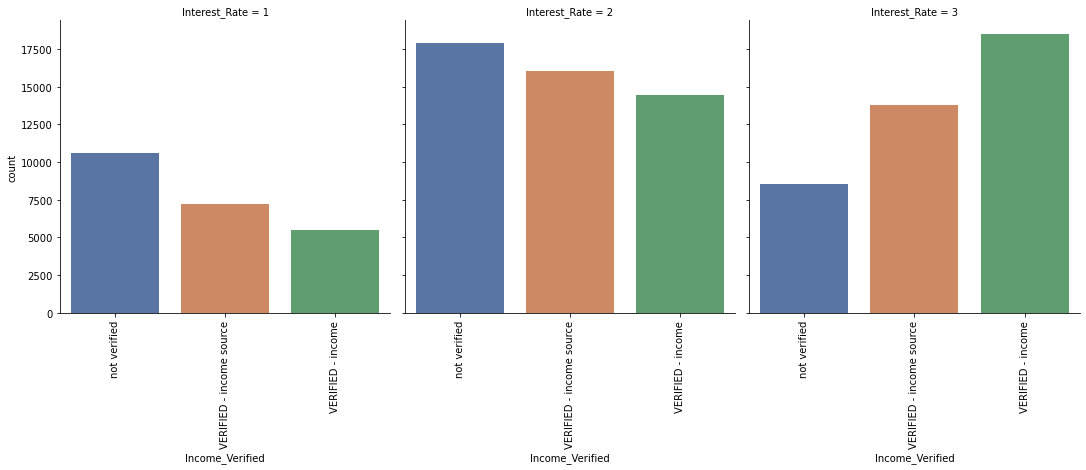

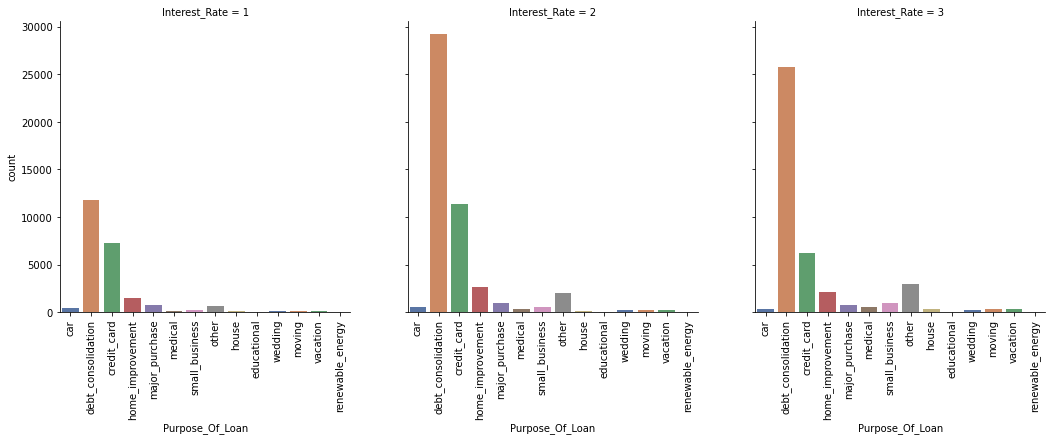

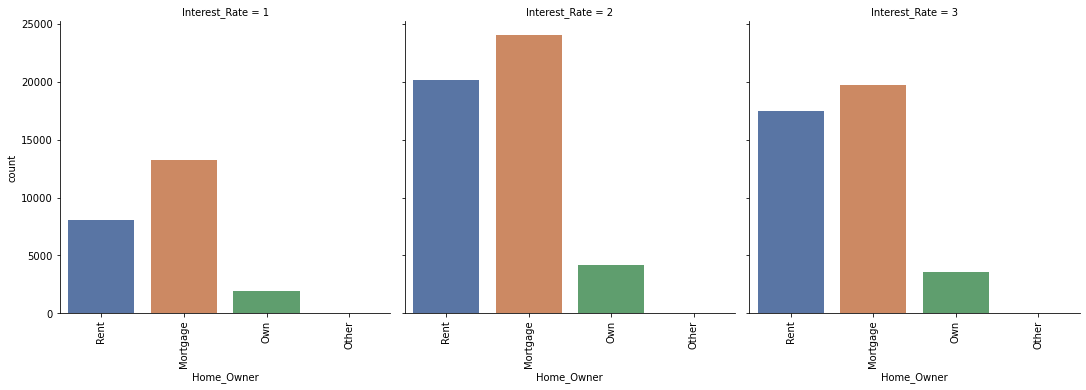

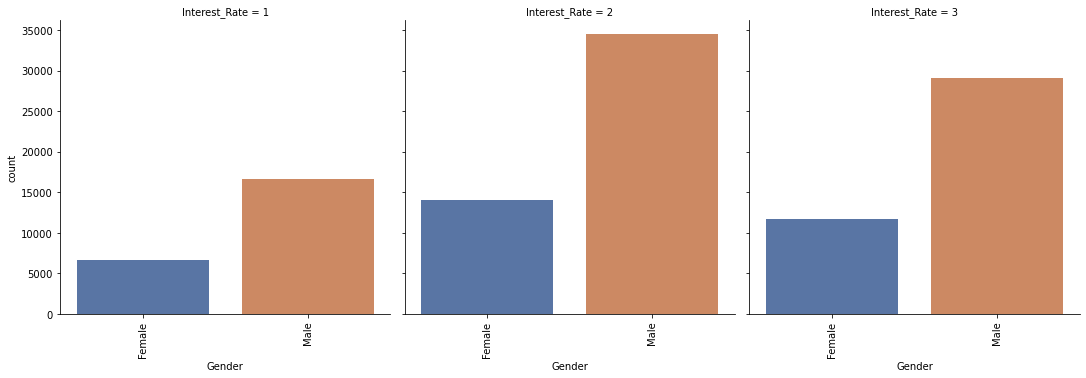

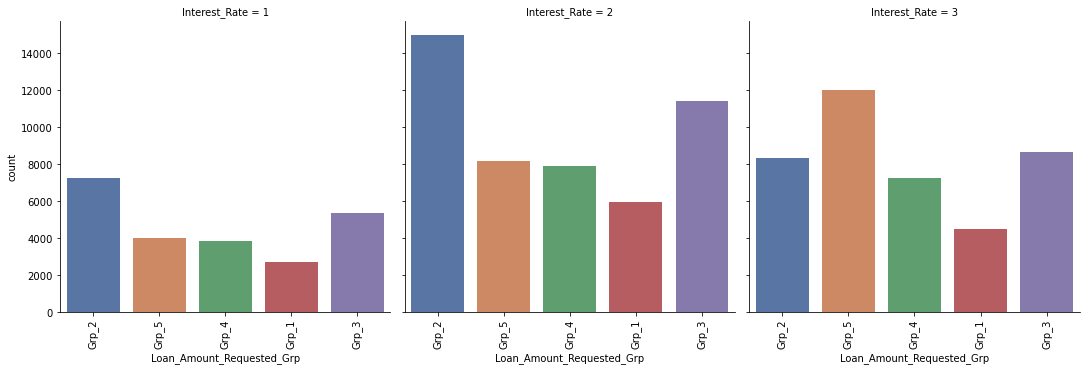

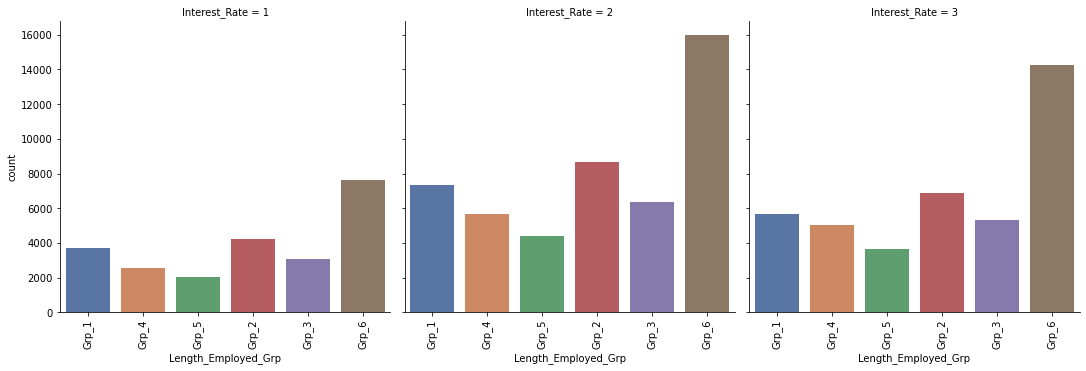

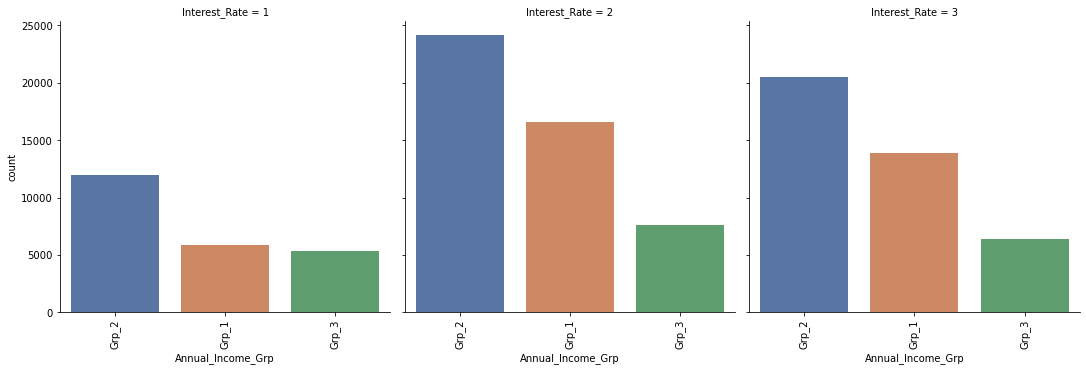

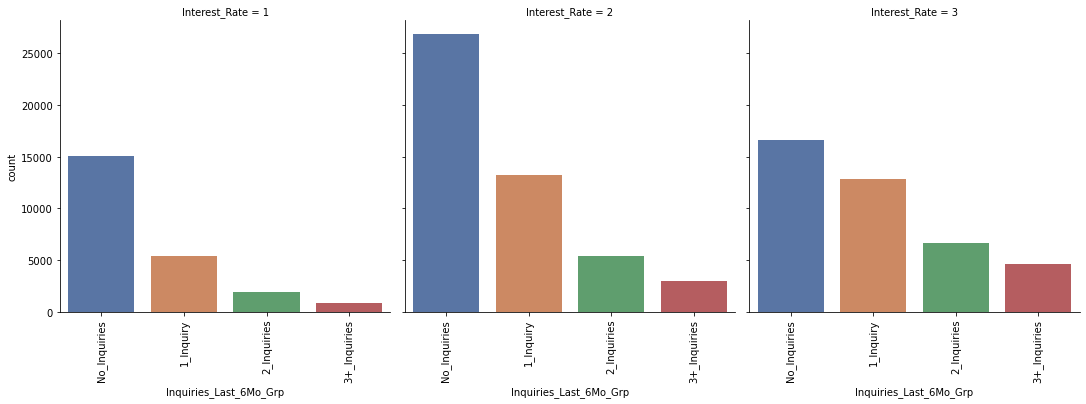

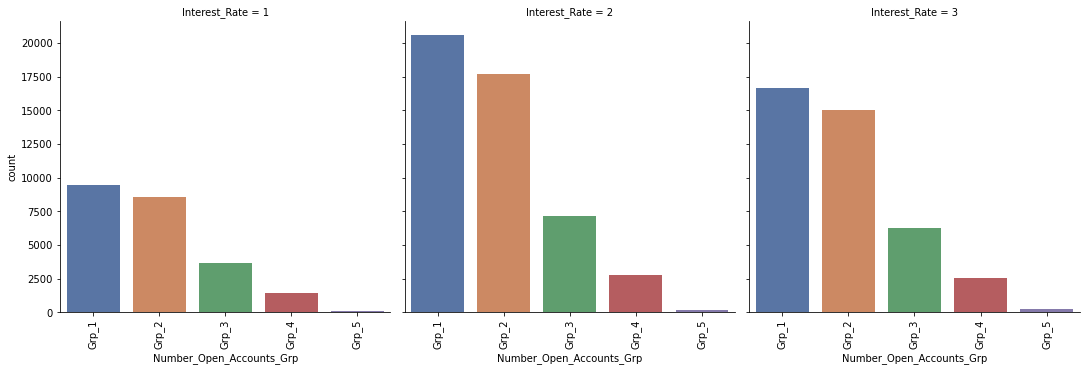

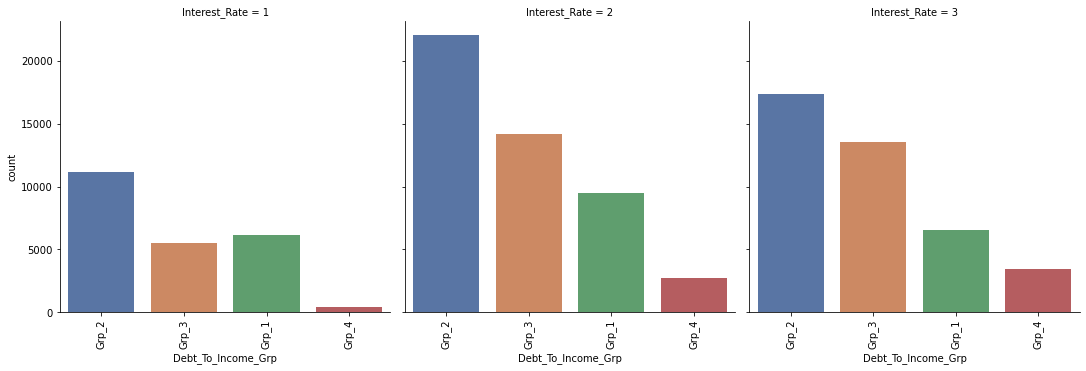

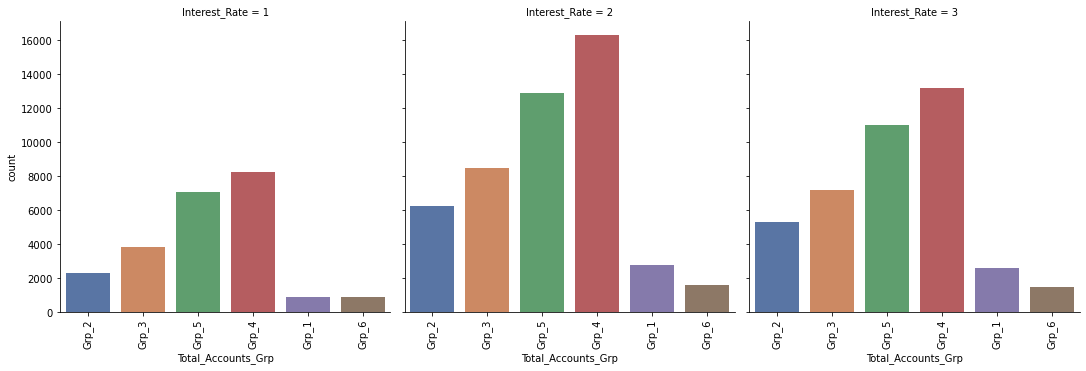

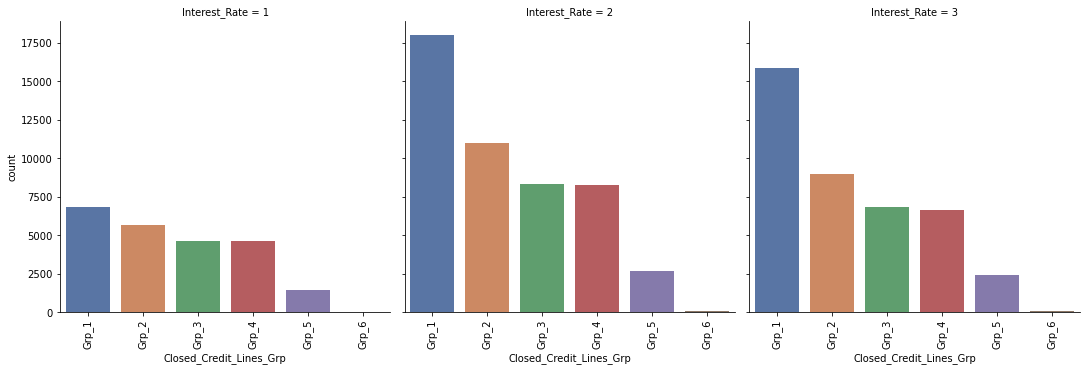

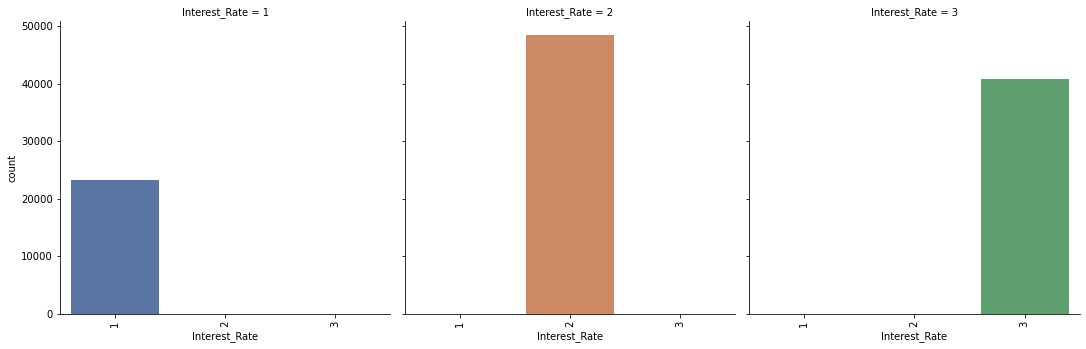

In [87]:
target = 'Interest_Rate'
for col in model_data.columns:
    s = sns.catplot(x=col, col = target, data=model_data, kind = 'count', palette='deep')
    s.set_xticklabels(rotation=90)

In [88]:
model_data['Interest_Rate'] = [ 0 if x==1 else 1 if x==2 else 2 for x in model_data['Interest_Rate']]

model_data.head()

,Income_Verified,Purpose_Of_Loan,Home_Owner,Gender,Loan_Amount_Requested_Grp,Length_Employed_Grp,Annual_Income_Grp,Inquiries_Last_6Mo_Grp,Number_Open_Accounts_Grp,Debt_To_Income_Grp,Total_Accounts_Grp,Closed_Credit_Lines_Grp,Interest_Rate
0,not verified,car,Rent,Female,Grp_2,Grp_1,Grp_2,No_Inquiries,Grp_1,Grp_2,Grp_2,Grp_1,0
2,VERIFIED - income source,debt_consolidation,Mortgage,Male,Grp_5,Grp_4,Grp_2,No_Inquiries,Grp_2,Grp_2,Grp_3,Grp_1,2
4,VERIFIED - income source,debt_consolidation,Own,Female,Grp_4,Grp_5,Grp_2,1_Inquiry,Grp_3,Grp_3,Grp_5,Grp_2,0
5,VERIFIED - income source,credit_card,Rent,Male,Grp_1,Grp_2,Grp_1,1_Inquiry,Grp_2,Grp_2,Grp_3,Grp_1,2
6,VERIFIED - income,debt_consolidation,Rent,Male,Grp_4,Grp_3,Grp_2,No_Inquiries,Grp_1,Grp_1,Grp_2,Grp_1,2


In [118]:
data_dummies = pd.get_dummies(model_data)
data_dummies.head()

test_data_dummies = pd.get_dummies(model_test_data)
test_data_dummies.head()

,Income_Verified_VERIFIED - income,Income_Verified_VERIFIED - income source,Income_Verified_not verified,Purpose_Of_Loan_car,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_educational,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,...,Total_Accounts_Grp_Grp_3,Total_Accounts_Grp_Grp_4,Total_Accounts_Grp_Grp_5,Total_Accounts_Grp_Grp_6,Closed_Credit_Lines_Grp_Grp_1,Closed_Credit_Lines_Grp_Grp_2,Closed_Credit_Lines_Grp_Grp_3,Closed_Credit_Lines_Grp_Grp_4,Closed_Credit_Lines_Grp_Grp_5,Closed_Credit_Lines_Grp_Grp_6
0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [119]:
X = data_dummies.drop('Interest_Rate',axis=1)
y = data_dummies['Interest_Rate'].reset_index()['Interest_Rate']

In [120]:
X.head()

,Income_Verified_VERIFIED - income,Income_Verified_VERIFIED - income source,Income_Verified_not verified,Purpose_Of_Loan_car,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_educational,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,...,Total_Accounts_Grp_Grp_3,Total_Accounts_Grp_Grp_4,Total_Accounts_Grp_Grp_5,Total_Accounts_Grp_Grp_6,Closed_Credit_Lines_Grp_Grp_1,Closed_Credit_Lines_Grp_Grp_2,Closed_Credit_Lines_Grp_Grp_3,Closed_Credit_Lines_Grp_Grp_4,Closed_Credit_Lines_Grp_Grp_5,Closed_Credit_Lines_Grp_Grp_6
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [121]:
y

0         0
1         2
2         0
3         2
4         2
         ..
112505    1
112506    1
112507    1
112508    2
112509    2
Name: Interest_Rate, Length: 112510, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=122)

In [123]:
from sklearn.metrics import confusion_matrix 

In [124]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(train_X, train_y) 
gnb_predictions = gnb.predict(test_X) 
  
# accuracy on X_test 
accuracy = gnb.score(test_X, test_y) 
print (accuracy )
  
# creating a confusion matrix 
cm = confusion_matrix(test_y, gnb_predictions) 

0.47634284359908746


In [125]:
cm

array([[3359, 2527, 1043],
       [4007, 6937, 3622],
       [1964, 4512, 5782]], dtype=int64)

In [126]:
from sklearn.metrics import f1_score

In [127]:
f1_score(test_y, gnb_predictions, average='weighted')

0.47955888819146403

Feature: 0, Score: 0.01633
Feature: 1, Score: 0.01215
Feature: 2, Score: 0.01789
Feature: 3, Score: 0.00410
Feature: 4, Score: 0.01608
Feature: 5, Score: 0.01880
Feature: 6, Score: 0.00054
Feature: 7, Score: 0.01056
Feature: 8, Score: 0.00203
Feature: 9, Score: 0.00627
Feature: 10, Score: 0.00348
Feature: 11, Score: 0.00239
Feature: 12, Score: 0.00901
Feature: 13, Score: 0.00039
Feature: 14, Score: 0.00464
Feature: 15, Score: 0.00215
Feature: 16, Score: 0.00244
Feature: 17, Score: 0.02364
Feature: 18, Score: 0.00023
Feature: 19, Score: 0.01642
Feature: 20, Score: 0.02274
Feature: 21, Score: 0.03249
Feature: 22, Score: 0.03261
Feature: 23, Score: 0.01619
Feature: 24, Score: 0.02080
Feature: 25, Score: 0.02334
Feature: 26, Score: 0.02031
Feature: 27, Score: 0.01542
Feature: 28, Score: 0.03130
Feature: 29, Score: 0.03463
Feature: 30, Score: 0.03059
Feature: 31, Score: 0.02866
Feature: 32, Score: 0.02510
Feature: 33, Score: 0.04189
Feature: 34, Score: 0.01663
Feature: 35, Score: 0.02002
Fe

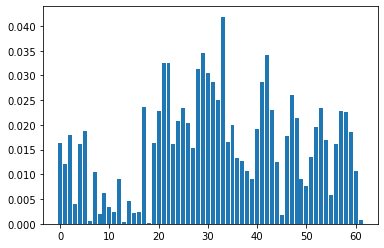

In [128]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [129]:
feature_importance = pd.concat([pd.Series(X.columns),pd.Series(importance)],axis=1)

In [131]:
feature_importance[feature_importance[1]>0.015][0]

0       Income_Verified_VERIFIED - income
2            Income_Verified_not verified
4             Purpose_Of_Loan_credit_card
5      Purpose_Of_Loan_debt_consolidation
17                    Home_Owner_Mortgage
19                         Home_Owner_Own
20                        Home_Owner_Rent
21                          Gender_Female
22                            Gender_Male
23        Loan_Amount_Requested_Grp_Grp_1
24        Loan_Amount_Requested_Grp_Grp_2
25        Loan_Amount_Requested_Grp_Grp_3
26        Loan_Amount_Requested_Grp_Grp_4
27        Loan_Amount_Requested_Grp_Grp_5
28              Length_Employed_Grp_Grp_1
29              Length_Employed_Grp_Grp_2
30              Length_Employed_Grp_Grp_3
31              Length_Employed_Grp_Grp_4
32              Length_Employed_Grp_Grp_5
33              Length_Employed_Grp_Grp_6
34                Annual_Income_Grp_Grp_1
35                Annual_Income_Grp_Grp_2
40    Inquiries_Last_6Mo_Grp_No_Inquiries
41         Number_Open_Accounts_Gr

In [132]:
train_X_imp = X[feature_importance[feature_importance[1]>0.015][0]]
test_X_imp = test_data_dummies[feature_importance[feature_importance[1]>0.015][0]]

In [133]:
train_X_imp

,Income_Verified_VERIFIED - income,Income_Verified_not verified,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Home_Owner_Mortgage,Home_Owner_Own,Home_Owner_Rent,Gender_Female,Gender_Male,Loan_Amount_Requested_Grp_Grp_1,...,Debt_To_Income_Grp_Grp_1,Debt_To_Income_Grp_Grp_2,Debt_To_Income_Grp_Grp_3,Total_Accounts_Grp_Grp_3,Total_Accounts_Grp_Grp_4,Total_Accounts_Grp_Grp_5,Closed_Credit_Lines_Grp_Grp_1,Closed_Credit_Lines_Grp_Grp_2,Closed_Credit_Lines_Grp_Grp_3,Closed_Credit_Lines_Grp_Grp_4
0,0,1,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
4,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
5,0,0,1,0,0,0,1,0,1,1,...,0,1,0,1,0,0,1,0,0,0
6,1,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164297,0,1,1,0,1,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
164298,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
164299,0,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
164300,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [134]:
test_X_imp

,Income_Verified_VERIFIED - income,Income_Verified_not verified,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Home_Owner_Mortgage,Home_Owner_Own,Home_Owner_Rent,Gender_Female,Gender_Male,Loan_Amount_Requested_Grp_Grp_1,...,Debt_To_Income_Grp_Grp_1,Debt_To_Income_Grp_Grp_2,Debt_To_Income_Grp_Grp_3,Total_Accounts_Grp_Grp_3,Total_Accounts_Grp_Grp_4,Total_Accounts_Grp_Grp_5,Closed_Credit_Lines_Grp_Grp_1,Closed_Credit_Lines_Grp_Grp_2,Closed_Credit_Lines_Grp_Grp_3,Closed_Credit_Lines_Grp_Grp_4
0,1,0,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
2,1,0,0,1,0,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
3,0,0,0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,1,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
5,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
109537,0,1,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
109538,0,1,1,0,0,0,1,0,1,1,...,0,1,0,0,0,0,0,1,0,0
109539,0,1,0,0,0,0,1,0,1,1,...,0,0,1,0,0,0,1,0,0,0


In [135]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold,KFold,GridSearchCV,GroupKFold
# from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

In [137]:
splits = 10
folds = StratifiedKFold(n_splits=splits, shuffle=True, random_state=22)
# predictions = np.zeros((len(X_valid), 3))
k = test_X_imp.columns
oof_preds = np.zeros((len(test_X_imp), 3))
feature_importance_df = pd.DataFrame()
final_preds = []
# random_state = [77,89,22,1007,1997,1890,2000,2020,8989,786,787,1999992,2021,7654]
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_X_imp, y)):
        print("Fold {}".format(fold_))
        X_trn,y_trn = train_X_imp[k].iloc[trn_idx],y.iloc[trn_idx]
        X_val,y_val = train_X_imp[k].iloc[val_idx],y.iloc[val_idx]
        clf = lgb.LGBMClassifier(random_state=22,n_jobs=-1,max_depth=-1,min_data_in_leaf=24,num_leaves=49,bagging_fraction=0.01,
                        colsample_bytree=1.0,lambda_l1=1,lambda_l2=11,learning_rate=0.1,n_estimators=5000)
        clf.fit(X_trn, y_trn, eval_metric='multi_logloss', eval_set=[(X_val,y_val)], verbose=False,early_stopping_rounds=100)
        y_val_preds = clf.predict_proba(X_val)
        final_preds.append(f1_score(y_pred=[np.argmax(x) for x in y_val_preds],y_true=y_val,average='weighted'))
#         predictions += clf.predict_proba(X_valid)
        oof_preds += clf.predict_proba(test_X_imp[k])
#         counter = counter + 1
oof_preds = oof_preds/splits
print(sum(final_preds)/10)

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
0.4881679618360919
